<h1>Problem Statement:</h1>
<img src = "Sources/runners-triathlon-competition-running-preview.jpg" width = "450" height = "150" alt = "Marathon Imagine">
<p>"Using Marathon Runner's Data we want to predict weather a runner will be able complete a 50 mile marathon based on their weekly train using logistic regression. We employed the use of logistic regresion since it gives us a binary result instead of a probability. Like a Yes/No."</p>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
      'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}

In [7]:
df = pd.DataFrame(d)

<h3>"Encoding binary data into something a machine can process"</h3>

In [12]:
df.columns

Index(['miles_per_week', 'completed_50m_ultra'], dtype='object')

In [15]:
fin_race = ['no','yes']

In [21]:
df['completed_50m_ultra_Binary'] = OrdinalEncoder(categories = [fin_race]).fit_transform(df[['completed_50m_ultra']])

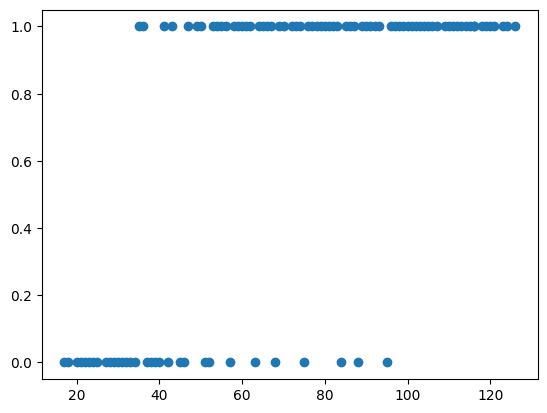

In [24]:
plt.scatter(df['miles_per_week'], df['completed_50m_ultra_Binary'])

<Axes: xlabel='completed_50m_ultra_Binary', ylabel='count'>

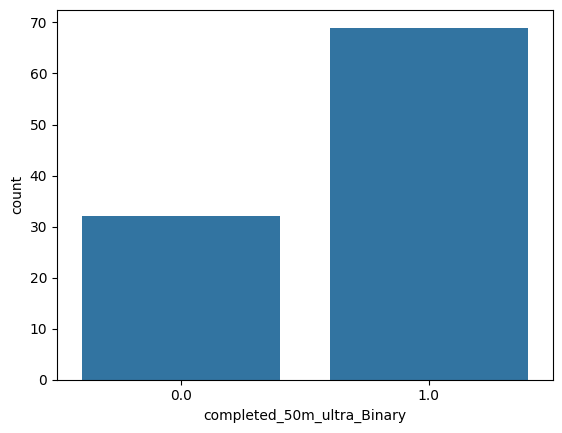

In [25]:
sns.countplot(x='completed_50m_ultra_Binary',data=df)

<h3>"We could see that vast majority of people completed the marathon, and the scatterplot looks very much like a sigmoid as 
expected, apart from few outliers"</h3>

In [33]:
df.iloc[:,0:1]

,miles_per_week
0,37
1,39
2,46
3,51
4,88
...,...
96,67
97,74
98,79
99,90


In [34]:
df.iloc[:,2]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
Name: completed_50m_ultra_Binary, Length: 101, dtype: float64

In [35]:
X = df.iloc[:,0:1] # Input predictor Var
y = df.iloc[:,2]   # Output target Var

<h3>"We're spliting the data which uses 80% for training and 20% for testing"</h3>

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 11)

In [49]:
model = LogisticRegression()
model.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

<h1>"Now we're predicting using the test data"</h1>

In [51]:
y_predict = model.predict(x_test)

In [53]:
model.score(x_test,y_test)

0.9047619047619048

In [63]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_predict))
print("\nClassification Report:\n\n",classification_report(y_test,y_predict))

Confusion Matrix:
 [[ 5  1]
 [ 1 14]]

Classification Report:

               precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.93      0.93      0.93        15

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

